# Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
train = pd.read_csv("train_tweet.csv")
test = pd.read_csv("test_tweets.csv")

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [3]:
train.head(6)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...


In [4]:
test.head(6)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips


In [5]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [6]:
train[train['label']== 0 ].head(10) #checking negative Comments!

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [7]:
train[train['label']== 1].head(10) #checking postive comments!

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: >

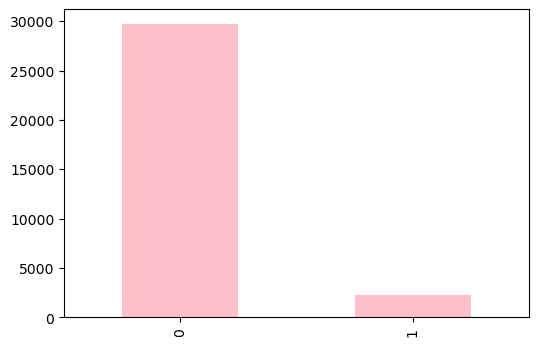

In [8]:
train['label'].value_counts().plot.bar(color ='pink',figsize = (6,4))

In [9]:
#adding column length to represent length of tweets!

train['len'] = train ['tweet'].str.len()
train['len'] = test ['tweet'].str.len()
train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,90.0
1,2,0,@user @user thanks for #lyft credit i can't us...,101.0
2,3,0,bihday your majesty,71.0
3,4,0,#model i love u take with u all the time in ...,142.0
4,5,0,factsguide: society now #motivation,93.0
5,6,0,[2/2] huge fan fare and big talking before the...,27.0
6,7,0,@user camping tomorrow @user @user @user @use...,92.0
7,8,0,the next school year is the year for exams.ð...,85.0
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,108.0
9,10,0,@user @user welcome here ! i'm it's so #gr...,66.0


In [10]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  15997.0  84.570044  29.552506  11.0  62.0  88.0  107.0  292.0  
1      31961.0   1200.0  84.230833  30.329619  13.0  61.0  87.0  108.0  179.0

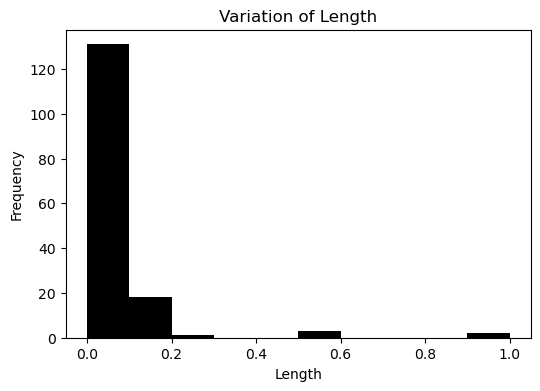

In [11]:
hist_data = train.groupby('len')['label'].mean(numeric_only=True)
hist_data.plot.hist(color='black', figsize=(6, 4))
plt.title('Variation of Length')
plt.xlabel('Length')
plt.show()

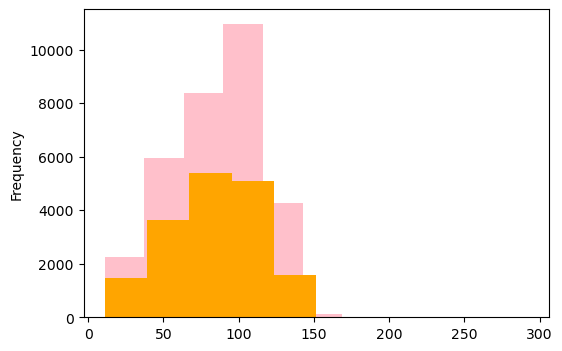

In [12]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6,4))

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

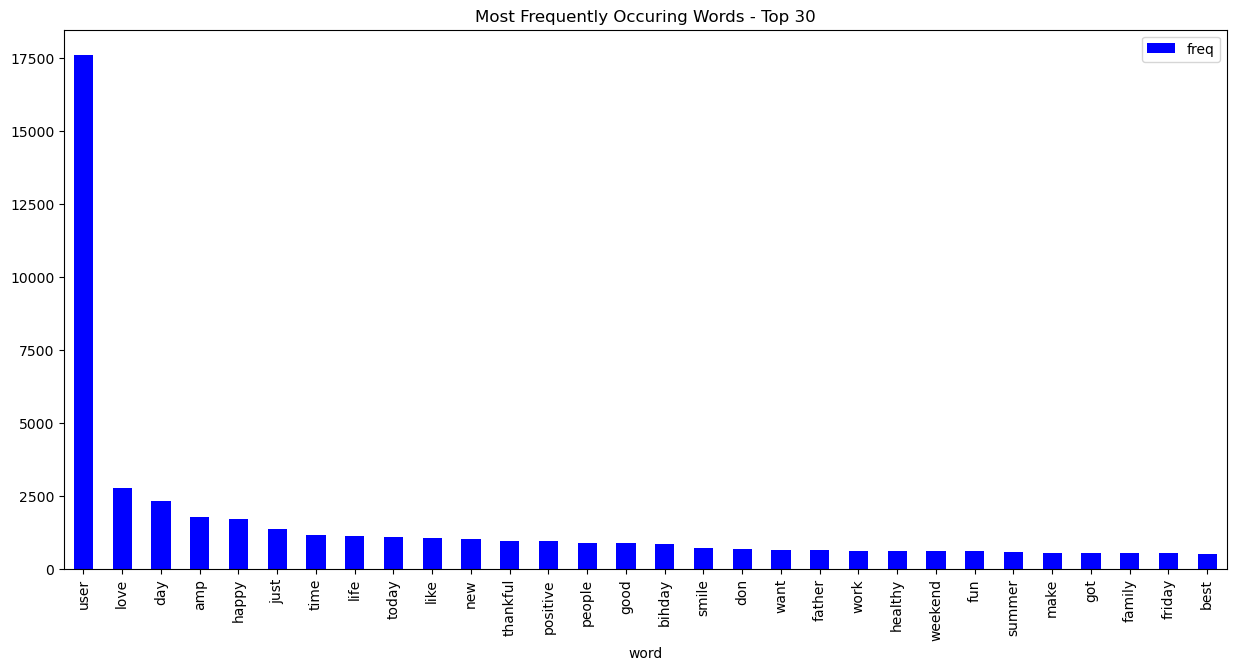

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words ='english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis = 0 )

words_freq = [(word,sum_words[0,i])for word,i in cv.vocabulary_.items()]
words_freq = sorted(words_freq,key = lambda x: x[1],reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

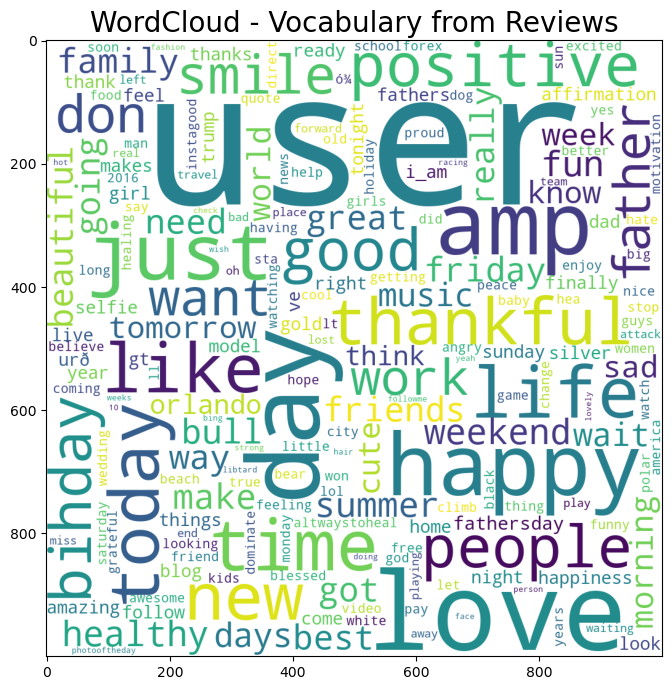

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 20)

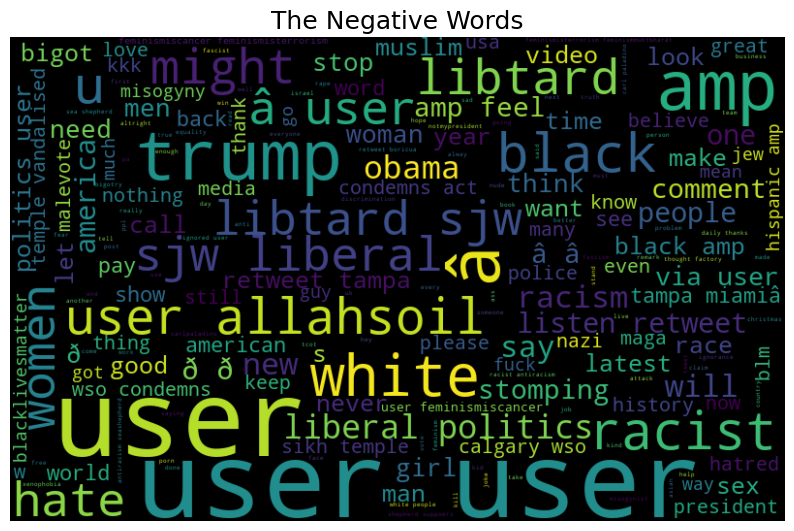

In [15]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words',fontsize = 18)
plt.show()


In [16]:
#Collecting hashtags!
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
        
    return hashtags

In [17]:
# extracting hashtags regular
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags negative
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])


HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

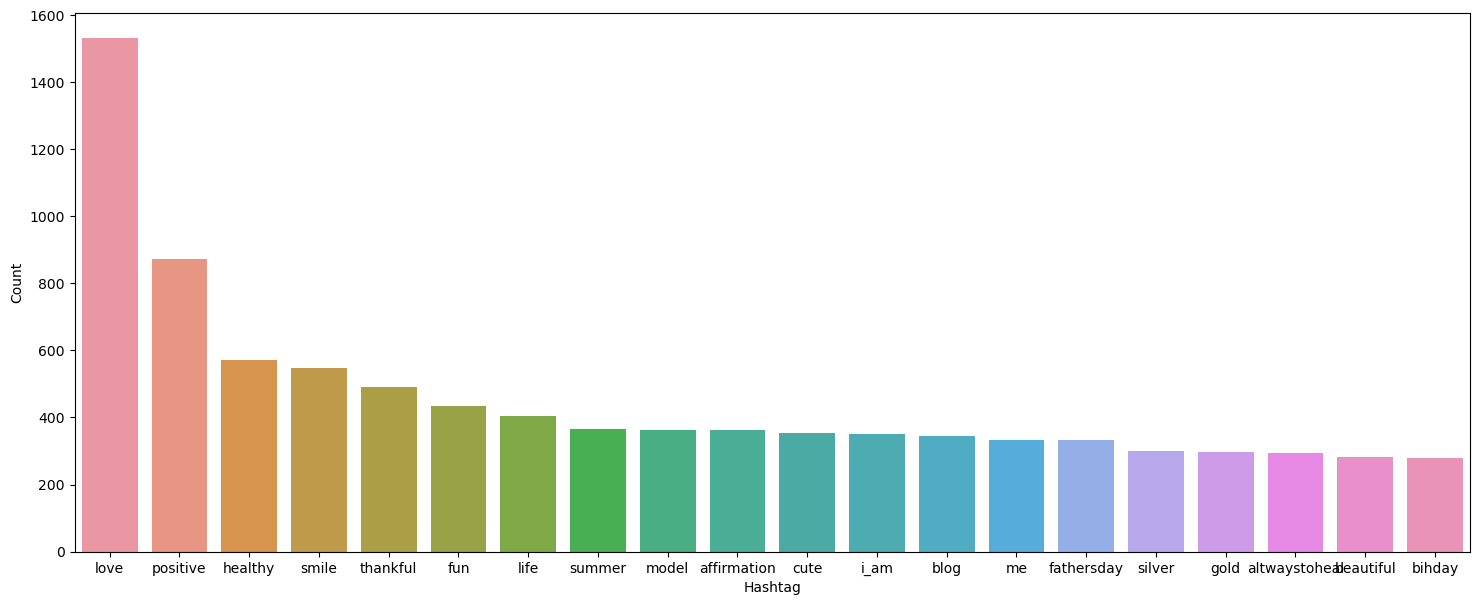

In [18]:
import nltk #important one!

a = nltk.FreqDist(HT_regular)#for regular 
s = pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})

s = s.nlargest(columns="Count",n = 20)
plt.figure(figsize=(18,7))
ax = sns.barplot(data = s, x ="Hashtag",y = "Count")
ax.set(ylabel ='Count')
plt.show()

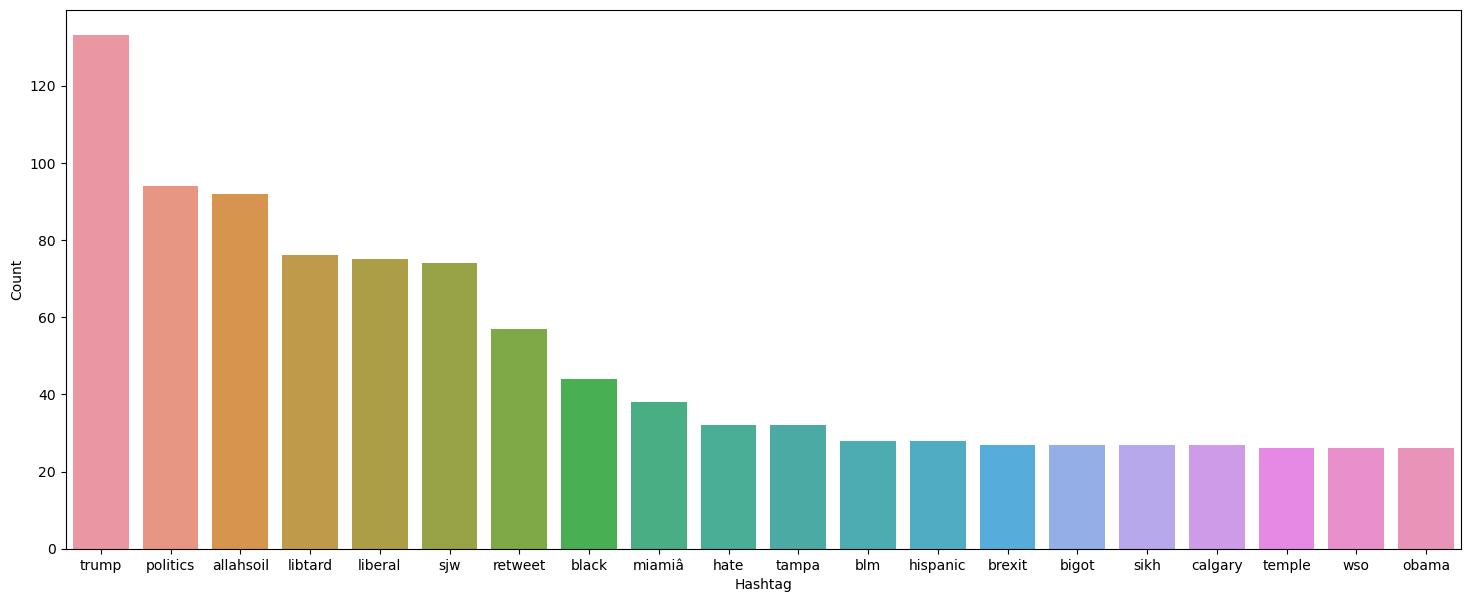

In [19]:
import nltk #important one!

a = nltk.FreqDist(HT_negative)#for negative 
s = pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})

s = s.nlargest(columns="Count",n = 20)
plt.figure(figsize=(18,7))
ax = sns.barplot(data = s, x ="Hashtag",y = "Count")
ax.set(ylabel ='Count')
plt.show()

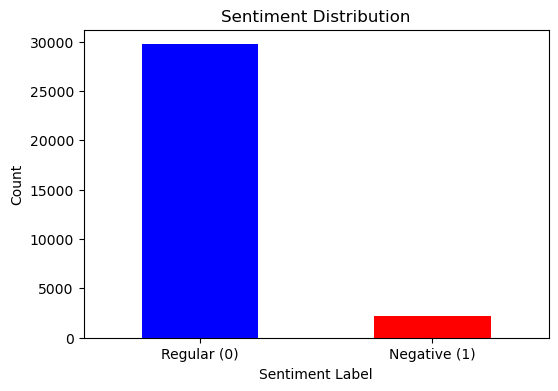

In [20]:
plt.figure(figsize=(6, 4))
train['label'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Regular (0)', 'Negative (1)'], rotation=0)
plt.show()


In [29]:
train['avg_word_length'] = train['tweet'].apply(lambda x: np.mean([len(word) for word in x.split()]))



<Axes: >

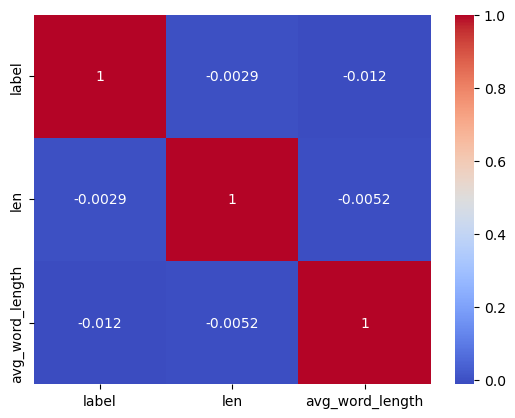

In [28]:
correlation_matrix = train[['label', 'len', 'avg_word_length']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
